In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Dropout, CuDNNLSTM, Bidirectional,LSTM
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras import layers
from keras.optimizers import SGD , Adam , RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import seaborn as sb

In [ ]:
# pip install xgboost==1.1.1
# PerItemcyclingTrial3(RegressionTrial)WithNormalization.ipynb

In [ ]:
df = pd.read_csv('FirstSecondFourthFifthSeventhEigthMegredCleaned.csv')#, sep=';'
df = df.drop(columns = ['KneeBlob2'])
df = df.apply(np.ceil)
df = df.astype(int, errors='ignore')
# df = df.drop(columns=['Distance'])
# print(len(df.columns))
# df.head(-3)
# df.dropna(thresh=2)
# df.dropna(inplace=True)
# df = df.dropna(how='all',axis='columns')
# df = df.dropna(how='all',axis='rows')
# df = df.dropna()
#df = df.loc[(df!=0).any(axis=1)] # For removing all zero rows
# df = df[df['Speed'] != 0]
print(len(df.columns))
print(len(df.shape))
# num_id = len(df._id.unique())
# print(num_id)
df.head(-1)

8
2


,Power,Rpm,Bpm,PedalBlob,HeelBlob,AnkleBlob,KneeBlob,HipBlob
0,94,81,110,58,89,93,74,46
1,91,81,111,10,90,104,99,39
2,89,82,111,53,91,93,79,18
3,95,82,111,80,87,102,70,41
4,91,82,111,26,94,103,123,43
...,...,...,...,...,...,...,...,...
2835,132,102,117,19,98,96,132,50
2836,137,99,117,68,89,105,84,32
2837,159,98,117,20,91,95,82,48
2838,148,99,117,22,97,101,134,50


In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [ ]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [ ]:
df = df.drop(columns=getDuplicateColumns(df))

print("Modified Dataframe", df, sep='\n')
df.head(-1)

Modified Dataframe
      Power  Rpm  Bpm  PedalBlob  HeelBlob  AnkleBlob  KneeBlob  HipBlob
0        94   81  110         58        89         93        74       46
1        91   81  111         10        90        104        99       39
2        89   82  111         53        91         93        79       18
3        95   82  111         80        87        102        70       41
4        91   82  111         26        94        103       123       43
...     ...  ...  ...        ...       ...        ...       ...      ...
2836    137   99  117         68        89        105        84       32
2837    159   98  117         20        91         95        82       48
2838    148   99  117         22        97        101       134       50
2839    157   99  119         64        88         94        75       30
2840    154   97  119         13        92         96        91       45

[2841 rows x 8 columns]


,Power,Rpm,Bpm,PedalBlob,HeelBlob,AnkleBlob,KneeBlob,HipBlob
0,94,81,110,58,89,93,74,46
1,91,81,111,10,90,104,99,39
2,89,82,111,53,91,93,79,18
3,95,82,111,80,87,102,70,41
4,91,82,111,26,94,103,123,43
...,...,...,...,...,...,...,...,...
2835,132,102,117,19,98,96,132,50
2836,137,99,117,68,89,105,84,32
2837,159,98,117,20,91,95,82,48
2838,148,99,117,22,97,101,134,50


In [ ]:
# df = df.drop(columns=['_id','ACCUMULATED_SENSORS', 'ALTITUDE (Luftdruck)','time','TORQUE (Device: 42903)','POWER (V3 BLE:0698263)','POWER (Device: 42903)','PEDAL_POWER_BALANCE (Device: 42903)','CADENCE (Device: 42903)','HR (brustgurt)','PEDAL_POWER_BALANCE (V3 BLE:0698263)']) # Cleaning the 3 columns that couldnt be detected in the duplicate function
# print(len(df.columns))
# df.head(-1)

In [ ]:
print('Number of rows',len(df))
print('---\nData Head')
print(df.head())
print(df.columns)
df.describe()

Number of rows 2841
---
Data Head
   Power  Rpm  Bpm  PedalBlob  HeelBlob  AnkleBlob  KneeBlob  HipBlob
0     94   81  110         58        89         93        74       46
1     91   81  111         10        90        104        99       39
2     89   82  111         53        91         93        79       18
3     95   82  111         80        87        102        70       41
4     91   82  111         26        94        103       123       43
Index(['Power', 'Rpm', 'Bpm', 'PedalBlob', 'HeelBlob', 'AnkleBlob', 'KneeBlob',
       'HipBlob'],
      dtype='object')


,Power,Rpm,Bpm,PedalBlob,HeelBlob,AnkleBlob,KneeBlob,HipBlob
count,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000
mean,131.645195,88.321718,120.572686,43.949666,79.124956,98.106301,92.459345,36.487856
std,48.782906,5.721160,13.093102,25.964764,21.926531,5.038650,21.636136,8.907147
min,12.000000,63.000000,84.000000,1.000000,35.000000,75.000000,70.000000,18.000000
25%,110.000000,85.000000,114.000000,21.000000,78.000000,95.000000,75.000000,30.000000
50%,116.000000,87.000000,117.000000,44.000000,89.000000,98.000000,83.000000,37.000000
75%,131.000000,90.000000,125.000000,66.000000,92.000000,102.000000,108.000000,44.000000
max,366.000000,106.000000,173.000000,90.000000,130.000000,105.000000,148.000000,50.000000


In [ ]:
df.to_csv (r'cleanedData2.csv', index = False, header=True)

In [ ]:
# split train input and output data
# X = df.drop(axis=0, columns=['POWER','TIME_TOTAL','PEDAL_POWER_BALANCE'])
X = df.drop(axis=0, columns=['HeelBlob','AnkleBlob','KneeBlob','HipBlob'])
Powercolumn = df["Power"]
Powermax_value = Powercolumn.max()
print(Powermax_value)
RPMcolumn = df["Rpm"]
RPMmax_value = RPMcolumn.max()
print(RPMmax_value)
BPMcolumn = df["Bpm"]
BPMmax_value = BPMcolumn.max()
print(BPMmax_value)
X["Power"] = X["Power"]/Powermax_value
X["Rpm"] = X["Rpm"]/RPMmax_value
X["Bpm"] = X["Bpm"]/BPMmax_value
X["PedalBlob"] = X["PedalBlob"]/360
# Y = df[['POWER','PEDAL_POWER_BALANCE']] 
# Y = df[['HeelBlob','AnkleBlob','KneeBlob','KneeBlob2','HipBlob']] 
Y = df[['HeelBlob','AnkleBlob','KneeBlob','HipBlob']] 
Y = Y/360
# Y = df[['HeelBlob']] 
# Y = Y/360
# Y = df[['AnkleBlob']] 
# Y = Y/360
# Y2 = df[['KneeBlob']] 
# Y2 = Y2/360
# Y3 = df[['HipBlob']] 
# Y3 = Y3/360

#Print the shape of X and Y
print(X)
print(Y)
# dataset = pd.read_csv('cleanedData2.csv',usecols=lambda x: x not in ['TIME_OF_DAY'], engine='python') #dataframe = pd.read_csv('cleanedData.csv', usecols=[1], engine='python')
# values = dataset.values
# values = values.astype('float32')
# print(values.shape[1])

366
106
173
         Power       Rpm       Bpm  PedalBlob
0     0.256831  0.764151  0.635838   0.161111
1     0.248634  0.764151  0.641618   0.027778
2     0.243169  0.773585  0.641618   0.147222
3     0.259563  0.773585  0.641618   0.222222
4     0.248634  0.773585  0.641618   0.072222
...        ...       ...       ...        ...
2836  0.374317  0.933962  0.676301   0.188889
2837  0.434426  0.924528  0.676301   0.055556
2838  0.404372  0.933962  0.676301   0.061111
2839  0.428962  0.933962  0.687861   0.177778
2840  0.420765  0.915094  0.687861   0.036111

[2841 rows x 4 columns]
      HeelBlob  AnkleBlob  KneeBlob   HipBlob
0     0.247222   0.258333  0.205556  0.127778
1     0.250000   0.288889  0.275000  0.108333
2     0.252778   0.258333  0.219444  0.050000
3     0.241667   0.283333  0.194444  0.113889
4     0.261111   0.286111  0.341667  0.119444
...        ...        ...       ...       ...
2836  0.247222   0.291667  0.233333  0.088889
2837  0.252778   0.263889  0.227778  0.1333

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize)

# Using Train Split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
# print(X_train)
# print(y_train)
# train_data = X_train
# train_data['PedalBlob'] = y_train.PedalBlob
# C_mat = train_data.corr()
# fig = plt.figure(figsize = (15,15))
# sb.heatmap(C_mat, vmax = .8, square = True)
# plt.show()
# X_train = np.array(X_train)
# X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
# print(X_train,X_train.shape,X_train.\)
# X_train = X_train.values.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_train = np.array(X_train)
# X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
# print(X_train)
print(X_train.shape,y_train.shape)


(2272, 4) (2272, 4)


In [ ]:
# from keras.losses import mean_squared_error
# def root_mean_squared_error(y_true, y_pred):
#         mse = mean_squared_error(y_train, predictions)
#         rmse = np.sqrt(mse)
#         return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
#               metrics =["accuracy"])
def lstmModel(X_train , y_train):
  # X_train = np.array(X_train)
  # X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
  # X_test = np.array(X_test)
  # X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
  
  #####Best In Total Trials 
  # Using Sequential and lstms and dense layers
  model = Sequential()
  # model.add(Dropout(0.3,input_shape=(X_train.shape[1],X_train.shape[2])))
  # model.add(LSTM(256,input_shape=(X_train.shape[1],X_train.shape[2]))) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # # model.add(LSTM(256,input_shape=(X_train.shape[1],X_train.shape[2]))) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # # model.add(LSTM(32)) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # model.add(Dense(512,activation='relu'))
  # model.add(Dense(256, activation='relu'))
  # # model.add(Dense(128, activation='linear'))
  # model.add(Dense(128,activation='relu'))
  # model.add(Dense(32,activation='relu'))
  # model.add(Dense(16,activation='relu'))
  model.add(layers.GRU(256,input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
  model.add(layers.SimpleRNN(128))
  model.add(Dense(32, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(32, activation='relu'))

  #Best so far
  # model.add(Dropout(0.3,input_shape=(X_train.shape[1],X_train.shape[2])))
  # model.add(LSTM(256,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True)) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # model.add(LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2]))) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # # model.add(LSTM(32)) # When changed to linear not relu got better rmse and 512 not 256 without activation
  # model.add(Dense(256, activation='relu'))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dense(64))
  ########################
  # model.add(LSTM(512,activation='linear',input_shape=(X_train.shape[1],X_train.shape[2]))) # When changed to linear not relu got better rmse and 512 not 256
  # model.add(Dense(256, activation='relu'))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dense(y_train.shape[1]))
  # model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse','accuracy'])
  #Best
  # model.add(LSTM(256))
  # model.add(Dense(256))
  # model.add(LSTM(512,input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
  # model.add(LSTM(512,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=False))
  # model.add(Dense(256))

  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(64, activation='relu'))

  # model.add(Bidirectional(LSTM(512)))
  # model.add(Dense(512, activation = 'relu'))
  # model.add(Dense(256, activation = 'relu'))
  # # model.add(Dense(256, activation = 'relu'))
  # model.add(Dense(256))
  # model.add(Dense(256))
  # model.add(Dense(100,activation='relu'))

  # Output Layer
  model.add(Dense(y_train.shape[1]))
  # optimizer = RMSprop(0.001)
  # model.compile(loss='mse',
  #                 optimizer=optimizer,
  #                 metrics=['mae', 'mse','accuracy'])
  opt = Adam(learning_rate=0.00001)
  model.compile(loss='mse',optimizer=opt, metrics=['mae', 'mse','accuracy'])
  print(K.eval(model.optimizer.lr))
  # model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01, 0.5), metrics=['accuracy'])
  # compile model
  # opt = SGD(lr=0.01, momentum=0.9)
  # model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model
  # model.fit(X_train, y_train, epochs=500,  batch_size = 16,verbose=2) # model.fit(X, Y, epochs=100,batch_size=16, verbose=1)
  model.summary()
  return model

  # model.fit(X, Y, validation_data=(testX, testy), epochs=100, verbose=0)
  # # evaluate the model
  # _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  # _, test_acc = model.evaluate(testX, testy, verbose=0)
  # print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
#               metrics =["accuracy"])
def denseModel():
  # Only Dense Layers Used
  model = Sequential()
  # The Input Layer :
  # model.add(Dense(1024, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

  # The Hidden Layers :
  # model.add(Dense(512, kernel_initializer='normal',activation='relu'))
  # model.add(Dense(256, kernel_initializer='normal',activation='relu'))
  # model.add(Dense(128, kernel_initializer='normal',activation='relu'))
  model.add(Dense(100, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(100,activation='relu'))
  # model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.3))
  # model.add(Dense(128,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(32,activation='relu'))

  # model.add(Dense(16,activation='relu'))

  # The Output Layer :
  model.add(Dense(y_train.shape[1]))
  
  # Compile the network :
  opt = Adam(learning_rate=0.00001)
  model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse','accuracy'])
  model.summary()
  return model



  #### Best So Far
  # model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1],activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(256,activation='relu'))
  # model.add(Dense(128,activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(64,activation='relu'))
  # model.add(Dropout(0.3))
  # model.add(Dense(32,activation='relu'))


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
# Create a classifier
model = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc")
model = MultiOutputRegressor(model)

# Fit the classifier with the training data
model.fit(X_train,y_train)
#-----------------------------------------------------------------------------------------------------------------------------------
# Using Multi output Regression Problem 
# example of multioutput regression test problem
from sklearn.svm import LinearSVR
# define model
# model = LinearSVR(max_iter=100000)
# model = MultiOutputRegressor(model)
# # fit model
# model.fit(X_train, y_train)

#------------------------------------------------------------------------------------------------------------------------------------
# Using Linear Regression
from sklearn.linear_model import LinearRegression
# define model
# model = LinearRegression()
# model = MultiOutputRegressor(model)
# # fit model
# model.fit(X_train, y_train)

# -------------------------------------------------------------------------------------------------------------------------------------
# Using Random Forest ################################################################## Best Performance in all with Root Mean Squared Error: 0.025499622085337244
# 81.27394636015325 with 5 tolerance
from sklearn.ensemble import RandomForestRegressor
# define model
# model = RandomForestRegressor(n_estimators= 1500, random_state=42)
# # model = RandomForestRegressor()
# model = MultiOutputRegressor(model)

# # # # fit model
# model.fit(X_train, y_train)
 

#-------------------------------------------------------------------------------------------------------------------------------------
#Using SVR
###############################Best So Far
from sklearn.svm import SVR

# model = SVR(kernel = 'rbf')
# # model = SVR()
# model = MultiOutputRegressor(model)

# model.fit(X_train, y_train)

# -------------------------------------------------------------------------------------------------------------------------------------
# Using KN
from sklearn.neighbors import KNeighborsRegressor
# define model
# model = KNeighborsRegressor()
# model = MultiOutputRegressor(model)

# # fit model
# model.fit(X_train, y_train)
# model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01, 0.5), metrics=['accuracy'])
# model.summary()
###################

# from sklearn.neighbors import NearestCentroid
# model = NearestCentroid()
# model = MultiOutputRegressor(model)
# model.fit(X_train, y_train)

## One Of The Best
from sklearn.linear_model import RidgeCV
# model = MultiOutputRegressor(RidgeCV())
# model.fit(X_train, y_train)
#############
from sklearn.linear_model import Lasso
# model = MultiOutputRegressor(Lasso())
# model.fit(X_train, y_train)
##############
from sklearn.linear_model import ElasticNet
# model = MultiOutputRegressor(ElasticNet(random_state=0))
# model.fit(X_train, y_train)
#####################
from sklearn.tree import DecisionTreeRegressor
# model = MultiOutputRegressor(DecisionTreeRegressor(max_depth=50))
# model.fit(X_train, y_train)
#####################
from sklearn.ensemble import GradientBoostingRegressor
# model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=1000))
# model.fit(X_train, y_train)
#################################
from sklearn.ensemble import AdaBoostRegressor
# model = MultiOutputRegressor(AdaBoostRegressor(n_estimators=1000,learning_rate=0.0001, loss='square'))
# model.fit(X_train, y_train)


#################################

In [ ]:
# model = lstmModel(X_train,y_train)
# model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=2)
# model = denseModel()
# model.fit(X_train, y_train, epochs=300, batch_size=32,verbose=2)
# 
###model.fit(X_train, y_train, epochs=500, batch_size=16,verbose=2) Best So Far


In [ ]:
# Use trained model to predict output of test dataset
# val = xgb.predict(X_test)
# lb = preprocessing.LabelBinarizer()
# lb.fit(y_test)
# y_test_lb = lb.transform(y_test)
# val_lb = lb.transform(val)
# roc_auc_score(y_test_lb, val_lb, average='macro')
#------------------------------------------------------------------------------------------------------
# Use trained model to predict output of test dataset
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
val = model.predict(X_test)
# val = np.ceil(val)
# val = val.astype(int)

# print(val)

# val = pd.DataFrame(val, columns=['Predicted Power','Predicted Pedal'])
# val = [x[0] for x in val] # Only for Linear Regression and KN
# Y = df[['HeelBlob','AnkleBlob','KneeBlob','KneeBlob2','HipBlob']] 
predicted_heel = [x[0] for x in val]
predicted_heel = np.ceil(np.array(predicted_heel)*360)
# predicted_heel = np.ceil(np.array(predicted_heel))

predicted_heel = predicted_heel.astype(int)

predicted_ankle = [x[1] for x in val]
predicted_ankle = np.ceil(np.array(predicted_ankle)*360)
# predicted_ankle = np.ceil(np.array(predicted_ankle))
predicted_ankle = predicted_ankle.astype(int)

predicted_knee = [x[2] for x in val]
predicted_knee = np.ceil(np.array(predicted_knee)*360)
# predicted_knee = np.ceil(np.array(predicted_knee))
predicted_knee = predicted_knee.astype(int)

# predicted_knee2 = [x[3] for x in val]
# predicted_knee2 = np.ceil(np.array(predicted_knee2)*360)
# predicted_knee2 = predicted_knee2.astype(int)
predicted_hip = [x[3] for x in val]
predicted_hip = np.ceil(np.array(predicted_hip)*360)
# predicted_hip = np.ceil(np.array(predicted_hip))
predicted_hip = predicted_hip.astype(int)





# predicted_pedal = [x[0] for x in val]
# predicted_heel = [x[1] for x in val]
# predicted_ankle = [x[2] for x in val]
# predicted_knee = [x[3] for x in val]
# predicted_knee2 = [x[4] for x in val]
# predicted_hip = [x[5] for x in val]
# predicted_power = [x[0] for x in val]
# predicted_pedal = [x[1] for x in val] 
# print(predicted_heel)
#### Correct is 
# val = model.predict(X_test)
# predicted_power = [x[0] for x in val]
# predicted_pedal = [x[1] for x in val] 
# print(predicted_pedal,predicted_pedal)

In [ ]:
from sklearn.metrics import accuracy_score
actualHeel = np.array(y_test.HeelBlob)*360
# actualHeel = np.array(y_test.HeelBlob)
actualHeel = actualHeel.astype(int)
actualHeelplot = actualHeel.astype(int)
# actualPower = actualPower.reshape(actualPower.shape[0],-1)
actualAnkle = np.array(y_test.AnkleBlob)*360
# actualAnkle = np.array(y_test.AnkleBlob)
actualAnkle = actualAnkle.astype(int)
actualAnkleplot = actualAnkle.astype(int)
actualKnee = np.array(y_test.KneeBlob)*360
# actualKnee = np.array(y_test.KneeBlob)
actualKnee = actualKnee.astype(int)
actualKneeplot = actualKnee.astype(int)

# actualKnee2 = np.array(y_test.KneeBlob2)*360
# actualKnee2 = actualKnee2.astype(int)
actualHip = np.array(y_test.HipBlob)*360
# actualHip = np.array(y_test.HipBlob)
actualHip = actualHip.astype(int)
actualHipplot = actualHip.astype(int)

tolerance = 5

accuracyPercentageHeel = (sum(np.isclose(predicted_heel,actualHeel,atol=tolerance))/len(actualHeel))*100
accuracyPercentageAnkle = (sum(np.isclose(predicted_ankle,actualAnkle,atol=tolerance))/len(actualAnkle))*100
accuracyPercentageKnee = (sum(np.isclose(predicted_knee,actualKnee,atol=tolerance))/len(actualKnee))*100
# accuracyPercentageKnee2 = (sum(np.isclose(predicted_knee2,actualKnee2,atol=tolerance))/len(actualKnee2))*100
accuracyPercentageHip = (sum(np.isclose(predicted_hip,actualHip,atol=tolerance))/len(actualHip))*100
# ,('Knee2 Percentage',accuracyPercentageKnee2),
# accuracyPercentage = [('Heel Percentage',accuracyPercentageHeel)]
# accuracyPercentage = [('Ankle Percentage',accuracyPercentageAnkle)]

accuracyPercentage = [('Heel Percentage',accuracyPercentageHeel),('Ankle Percentage',accuracyPercentageAnkle),('Knee Percentage',accuracyPercentageKnee),('Hip Percentage',accuracyPercentageHip)]
# totalAccuracy= np.sum([accuracyPercentageAnkle])
totalAccuracy = np.sum([accuracyPercentageHeel,accuracyPercentageAnkle,accuracyPercentageKnee,accuracyPercentageHip])

# output = pd.DataFrame({'Actual POWER': y_test.POWER,'Predicted POWER':predicted_power , 'Actual Pedal':y_test.PEDAL_POWER_BALANCE,'Predicted Pedal':predicted_pedal})  # [x[0] for x in val] For linear Regression,  Default is val (Random Forest)
# 'Actual KneeBlob2':actualKnee2,'Predicted Knee2':predicted_knee2,
# output = pd.DataFrame({'Actual HeelBlob': actualHeel,'Predicted HeelBlob':predicted_heel})
# output = pd.DataFrame({'Actual AnkleBlob':actualAnkle,'Predicted Ankle':predicted_ankle})

output = pd.DataFrame({'Actual HeelBlob': actualHeel,'Predicted HeelBlob':predicted_heel , 'Actual AnkleBlob':actualAnkle,'Predicted Ankle':predicted_ankle,'Actual KneeBlob':actualKnee,'Predicted Knee':predicted_knee,'Actual HipBlob':actualHip,'Predicted Hip':predicted_hip})  # [x[0] for x in val] For linear Regression,  Default is val (Random Forest)
# Y = df[['HeelBlob','AnkleBlob','KneeBlob','KneeBlob2','HipBlob']] 
# actualPedal = np.array(y_test.PedalBlob)
actualHeel = np.array(y_test.HeelBlob)
actualAnkle = np.array(y_test.AnkleBlob)
actualKnee = np.array(y_test.KneeBlob)
# actualKnee2 = np.array(y_test.KneeBlob2)
actualHip = np.array(y_test.HipBlob)

# print(actualPedal.shape,actualPedal.shape)

# actualPedal = actualPedal.reshape(actualPedal.shape[0],-1)
# actualKnee2
# actual = np.array((actualHeel)).T
# actual = np.array((actualAnkle)).T

actual = np.array((actualHeel,actualAnkle,actualKnee,actualHip)).T
# print(actual)
# actual = pd.DataFrame(data= [actualPower, actualPedal], columns=['a', 'b'])
# output = pd.DataFrame()
# # print(y_test.POWER,val)
# output['Expected Output'] = y_test.POWER
# output['Predicted Output'] = val
# print(y_test['POWER'], val)
print(output)
output.to_csv (r'output.csv', index = False, header=True)
print(accuracyPercentage)
print(totalAccuracy/4)
# print(actual)
# accuracy=accuracy_score(output['Expected Output'],output['Predicted Output'])
# print(accuracy)

     Actual HeelBlob  Predicted HeelBlob  ...  Actual HipBlob  Predicted Hip
0                 93                  94  ...              48             46
1                 84                  80  ...              18             28
2                 37                  95  ...              24             31
3                 41                  96  ...              31             28
4                 40                  92  ...              29             42
..               ...                 ...  ...             ...            ...
564               91                  90  ...              43             42
565               94                  95  ...              27             47
566               88                  88  ...              36             34
567               38                  92  ...              36             46
568               86                  91  ...              47             42

[569 rows x 8 columns]
[('Heel Percentage', 52.899824253075565), ('Ankle Pe

In [ ]:
from sklearn.model_selection import validation_curve


In [ ]:
# Accuracy Metrics 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(actual, val))
print('Mean Squared Error:', metrics.mean_squared_error(actual, val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(actual, val)))
# Mean Absolute Error: 2.6669696969696974       Mean Absolute Error: 3.0045454545454557
# Mean Squared Error: 40.80139090909091         Mean Squared Error: 51.86822727272727
# Root Mean Squared Error: 6.3875966457730335   Root Mean Squared Error: 7.2019599605057
# Root mean square of our predictions is less than 5% of the mean percentage of the Power 7.428/152.161616 *100 = 4% for Random Forest          (Best)
# Root mean square of our predictions is less than 5% of the mean percentage of the Power  6.387/152.161616 *100 = 4.19% for Random Forest with wrapper multiout   (Best)
# Root mean square of our predictions is greater than 5% of the mean percentage of the Power 9.712/152.161616 *100 = 6.38% for Linear Regression
# Root mean square of our predictions is greater than 5% of the mean percentage of the Power 11.58/152.161616 *100 = 7.6% for Linear SVR
# Root mean square of our predictions is greater than 5% of the mean percentage of the Power 47.5793815561231/152.161616 *100 = 31.25% for  SVR   (Worst)
# Root mean square of our predictions is greater than 5% of the mean percentage of the Power 17/152.161616 *100 = 11.18% for KN
# Root mean square of our predictions is greater than 5% of the mean percentage of the Power 10/(152.161616+51)/2 *100 = 12.18% for LSTM and Dense Layers



Mean Absolute Error: 0.034176674477641084
Mean Squared Error: 0.0032150397871509476
Root Mean Squared Error: 0.056701320858961894


Text(0.5, 1.0, 'Hip Plot (Black is the actual and Red is Predicted')

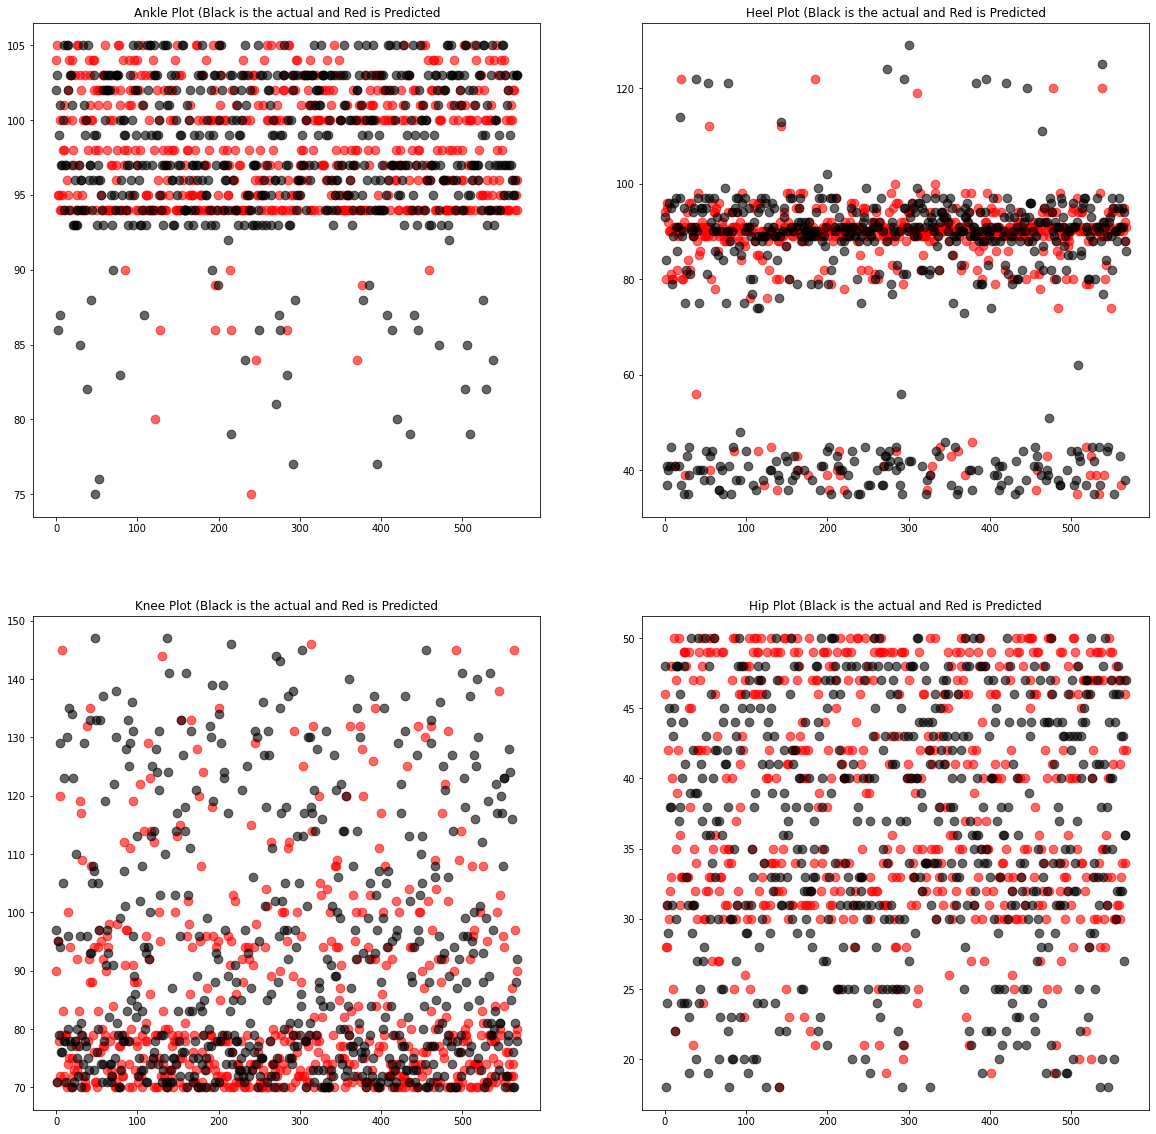

In [ ]:
# fig = plt.figure(figsize=(20,20))
# axes = fig.subplots(2,2)

# axes[0,0].scatter(predicted_ankle,actualAnkleplot,c='y',marker=',',s=50)
# axes[0,0].scatter(actualAnkleplot,predicted_ankle,c='black',marker='.',s=100)
# axes[0,0].set_title('Ankle Plot (Black is the actual and Yellow is Predicted')
# axes[0,1].scatter(predicted_heel,actualHeelplot,c='y',marker=',',s=50)
# axes[0,1].scatter(actualHeelplot,predicted_heel,c='black',marker='.',s=100)
# axes[0,1].set_title('Heel Plot (Black is the actual and Yellow is Predicted')
# axes[1,0].scatter(predicted_knee,actualKneeplot,c='y',marker=',',s=50)
# axes[1,0].scatter(actualKneeplot,predicted_knee,c='black',marker='.',s=100)
# axes[1, 0].set_title('Knee Plot (Black is the actual and Yellow is Predicted')
# axes[1,1].scatter(predicted_hip,actualHipplot,c='y',marker=',',s=50)
# axes[1,1].scatter(actualHipplot,predicted_hip,c='black',marker='.',s=100)
# axes[1, 1].set_title('Hip Plot (Black is the actual and Yellow is Predicted')
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(2,2)

# axes[0,0].scatter(actualAnkleplot,predicted_ankle,c='y',marker=',',s=50)
# axes[0,0].scatter(actualAnkleplot,list(range(1, 360)),c='black',marker='.',s=100)
# axes[0,0].plot([actualAnkleplot.min(), actualAnkleplot.max()], [actualAnkleplot.min(), actualAnkleplot.max()], 'k--', lw=4)
axes[0,0].scatter(x = range(0, predicted_ankle.size), y=predicted_ankle, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[0,0].scatter(x = range(0, actualAnkleplot.size), y=actualAnkleplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[0,0].margins(0.5)
axes[0,0].set_title('Ankle Plot (Black is the actual and Red is Predicted')


axes[0,1].scatter(x = range(0, predicted_heel.size), y=predicted_heel, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[0,1].scatter(x = range(0, actualHeelplot.size), y=actualHeelplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[0,1].scatter(predicted_heel,actualHeelplot,c='y',marker=',',s=50)
# axes[0,1].scatter(actualHeelplot,predicted_heel,c='black',marker='.',s=100)
axes[0,1].set_title('Heel Plot (Black is the actual and Red is Predicted')


axes[1,0].scatter(x = range(0, predicted_knee.size), y=predicted_knee, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[1,0].scatter(x = range(0, actualKneeplot.size), y=actualKneeplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[1,0].scatter(predicted_knee,actualKneeplot,c='y',marker=',',s=50)
# axes[1,0].scatter(actualKneeplot,predicted_knee,c='black',marker='.',s=100)
axes[1, 0].set_title('Knee Plot (Black is the actual and Red is Predicted')


axes[1,1].scatter(x = range(0, predicted_hip.size), y=predicted_hip, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[1,1].scatter(x = range(0, actualHipplot.size), y=actualHipplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)

# axes[1,1].scatter(predicted_hip,actualHipplot,c='y',marker=',',s=50)
# axes[1,1].scatter(actualHipplot,predicted_hip,c='black',marker='.',s=100)
axes[1, 1].set_title('Hip Plot (Black is the actual and Red is Predicted')
# plt.margins(-0.1)

In [ ]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return (mse,rmse)
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return (mse,rmse)
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
print(calc_metrics(X_train, y_train, X_test, y_test, model))
from sklearn.model_selection import cross_val_score
# ols_cv_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
# ols_cv_mse.mean()

((0.0019005415838006434, 0.04359520138502222), (0.0032150397871509476, 0.056701320858961894))


KeyboardInterrupt: ignored

In [ ]:
df4 = pd.read_csv('SeventhTrialMegredCleaned.csv')#, sep=';'
df2 = df4[["Power","Rpm","Bpm","PedalBlob"]]
df3 = df4[["HeelBlob","AnkleBlob","KneeBlob","HipBlob"]]
# df2 = pd.read_csv('testmodel2seventh.csv')#, sep=';'
# df3 = pd.read_csv('SeventhTrialAnglesTest.csv')
# df3 = df3.drop(axis=0, columns=['KneeBlob2'])
# df3 = df3[['AnkleBlob']]SixthTrialMerged SeventhTrialMegredCleaned
df3 = df3.apply(np.ceil)
df3 = df3.astype(int, errors='ignore')
df2 = df2.apply(np.ceil)
df2 = df2.astype(int, errors='ignore')
print(df2)
print(df3)
df3 = df3/360
Powercolumn = df2["Power"]
Powermax_value2 = Powercolumn.max()
print(Powermax_value)
RPMcolumn = df2["Rpm"]
RPMmax_value2 = RPMcolumn.max()
print(RPMmax_value)
BPMcolumn = df2["Bpm"]
BPMmax_value2 = BPMcolumn.max()
# if not (Powermax_value>=Powermax_value2) :
#   Powermax_value = Powermax_value2
# if not (RPMmax_value>=RPMmax_value2) :
#   RPMmax_value = RPMmax_value2
# if not (BPMmax_value>=BPMmax_value2) :
#   BPMmax_value = BPMmax_value2
# print(BPMmax_value)
df2["Power"] = df2["Power"]/Powermax_value
df2["Rpm"] = df2["Rpm"]/RPMmax_value
df2["Bpm"] = df2["Bpm"]/BPMmax_value
df2["PedalBlob"] = df2["PedalBlob"]/360



     Power  Rpm  Bpm  PedalBlob
0      106   81  119         16
1      116   81  119          6
2      110   80  119         16
3      107   80  120         67
4      111   80  120         14
..     ...  ...  ...        ...
226    137   99  117         68
227    159   98  117         20
228    148   99  117         22
229    157   99  119         64
230    154   97  119         13

[231 rows x 4 columns]
     HeelBlob  AnkleBlob  KneeBlob  HipBlob
0         124         85       146       42
1          95         97       127       43
2          93         99        93       46
3          89        105        74       30
4          98        100       135       40
..        ...        ...       ...      ...
226        89        105        84       32
227        91         95        82       48
228        97        101       134       50
229        88         94        75       30
230        92         96        91       45

[231 rows x 4 columns]
366
106


In [ ]:
# print(X_train.shape)
inputLayer = df2.to_numpy()
# inputLayer = np.reshape(inputLayer, (inputLayer.shape[0],1,inputLayer.shape[1]))
print(inputLayer)
# print(df3)

[[0.28961749 0.76415094 0.68786127 0.04444444]
 [0.31693989 0.76415094 0.68786127 0.01666667]
 [0.30054645 0.75471698 0.68786127 0.04444444]
 [0.29234973 0.75471698 0.69364162 0.18611111]
 [0.30327869 0.75471698 0.69364162 0.03888889]
 [0.30054645 0.75471698 0.69364162 0.07222222]
 [0.31147541 0.75471698 0.69364162 0.20277778]
 [0.31147541 0.75471698 0.69364162 0.02222222]
 [0.29508197 0.75471698 0.69364162 0.10833333]
 [0.31420765 0.75471698 0.68786127 0.18055556]
 [0.30054645 0.75471698 0.68786127 0.00277778]
 [0.28415301 0.75471698 0.68208092 0.13888889]
 [0.30054645 0.75471698 0.67630058 0.05833333]
 [0.30874317 0.75471698 0.67630058 0.025     ]
 [0.28142077 0.75471698 0.67630058 0.16111111]
 [0.29234973 0.75471698 0.67630058 0.00555556]
 [0.29234973 0.75471698 0.67630058 0.03333333]
 [0.31967213 0.75471698 0.67630058 0.17222222]
 [0.33333333 0.74528302 0.67630058 0.03333333]
 [0.31147541 0.74528302 0.67630058 0.06111111]
 [0.29234973 0.75471698 0.67630058 0.20277778]
 [0.29234973 

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize)

val = model.predict(inputLayer)
# val = np.ceil(val)
# val = val.astype(int)
print(val)

# val = pd.DataFrame(val, columns=['Predicted Power','Predicted Pedal'])
# val = [x[0] for x in val] # Only for Linear Regression and KN
# Y = df[['HeelBlob','AnkleBlob','KneeBlob','KneeBlob2','HipBlob']] 
predicted_heel = [x[0] for x in val]
predicted_heel = np.ceil(np.array(predicted_heel)*360)
# predicted_heel = np.ceil(np.array(predicted_heel))
predicted_heel = predicted_heel.astype(int)
predicted_ankle = [x[1] for x in val]
predicted_ankle = np.ceil(np.array(predicted_ankle)*360)
# predicted_ankle = np.ceil(np.array(predicted_ankle))
predicted_ankle = predicted_ankle.astype(int)

predicted_knee = [x[2] for x in val]
predicted_knee = np.ceil(np.array(predicted_knee)*360)
# predicted_knee = np.ceil(np.array(predicted_knee))
predicted_knee = predicted_knee.astype(int)

# # predicted_knee2 = [x[3] for x in val]
# # predicted_knee2 = np.ceil(np.array(predicted_knee2)*360)
# # predicted_knee2 = predicted_knee2.astype(int)
predicted_hip = [x[3] for x in val]
predicted_hip = np.ceil(np.array(predicted_hip)*360)
# predicted_hip = np.ceil(np.array(predicted_hip))
predicted_hip = predicted_hip.astype(int)


actualHeel = np.array(df3.HeelBlob)*360
# actualHeel = np.array(df3.HeelBlob)
actualHeel = actualHeel.astype(int)
actualHeelplot = actualHeel.astype(int)

# actualPower = actualPower.reshape(actualPower.shape[0],-1)
actualAnkle = np.array(df3.AnkleBlob)*360
# actualAnkle = np.array(df3.AnkleBlob)
actualAnkle = actualAnkle.astype(int)
actualAnkleplot = actualAnkle.astype(int)

actualKnee = np.array(df3.KneeBlob)*360
# actualKnee = np.array(df3.KneeBlob)
actualKnee = actualKnee.astype(int)
actualKneeplot = actualKnee.astype(int)

# # actualKnee2 = np.array(df3.KneeBlob2)*360
# # actualKnee2 = actualKnee2.astype(int)

actualHip = np.array(df3.HipBlob)*360
# actualHip = np.array(df3.HipBlob)
actualHip = actualHip.astype(int)
actualHipplot = actualHip.astype(int)

tolerance = 10
accuracyPercentageHeel = (sum(np.isclose(predicted_heel,actualHeel,atol=tolerance))/len(actualHeel))*100

accuracyPercentageAnkle = (sum(np.isclose(predicted_ankle,actualAnkle,atol=tolerance))/len(actualAnkle))*100
totalAccuracy = accuracyPercentageAnkle

accuracyPercentageKnee = (sum(np.isclose(predicted_knee,actualKnee,atol=tolerance))/len(actualKnee))*100
# accuracyPercentageKnee2 = (sum(np.isclose(predicted_knee2,actualKnee2,atol=tolerance))/len(actualKnee2))*100
accuracyPercentageHip = (sum(np.isclose(predicted_hip,actualHip,atol=tolerance))/len(actualHip))*100
accuracyPercentage = [('Heel Percentage',accuracyPercentageHeel),('Ankle Percentage',accuracyPercentageAnkle),('Knee Percentage',accuracyPercentageKnee),('Hip Percentage',accuracyPercentageHip)]

# totalAccuracy= np.sum([accuracyPercentageAnkle])

totalAccuracy = np.sum([accuracyPercentageHeel,accuracyPercentageAnkle,accuracyPercentageKnee,accuracyPercentageHip])
# accuracyPercentage = [('Heel Percentage',accuracyPercentageHeel),('Ankle Percentage',accuracyPercentageAnkle),('Knee Percentage',accuracyPercentageKnee),('Hip Percentage',accuracyPercentageHip)]
# accuracyPercentage = [np.average(predicted_heel/actualHeel)*100,np.average(predicted_ankle/actualAnkle)*100,np.average(predicted_knee/actualKnee)*100,np.average(predicted_knee2/actualKnee2)*100,np.average(predicted_hip/actualHip)*100]
# accuracyPercentage = [('Heel Percentage',accuracyPercentageHeel)]
# accuracyPercentage = [('Ankle Percentage',accuracyPercentageAnkle)]

output = pd.DataFrame({'Actual HeelBlob': actualHeel,'Predicted HeelBlob':predicted_heel , 'Actual AnkleBlob':actualAnkle,'Predicted Ankle':predicted_ankle,'Actual KneeBlob':actualKnee,'Predicted Knee':predicted_knee,'Actual HipBlob':actualHip,'Predicted Hip':predicted_hip})  # [x[0] for x in val] For linear Regression,  Default is val (Random Forest)
# output = pd.DataFrame({'Actual HeelBlob': actualHeel,'Predicted HeelBlob':predicted_heel })
# output = pd.DataFrame({'Actual AnkleBlob':actualAnkle,'Predicted Ankle':predicted_ankle })

# Y = df[['HeelBlob','AnkleBlob','KneeBlob','KneeBlob2','HipBlob']] 

actualHeel = np.array(df3.HeelBlob)
# actualPower = actualPower.reshape(actualPower.shape[0],-1)
actualAnkle = np.array(df3.AnkleBlob)
actualKnee = np.array(df3.KneeBlob)
# actualKnee2 = np.array(df3.KneeBlob2)
actualHip = np.array(df3.HipBlob)

# print(actualPedal.shape,actualPedal.shape)

# actualPedal = actualPedal.reshape(actualPedal.shape[0],-1)
# actual = np.array((actualHeel)).T
# actual = np.array((actualAnkle)).T

actual = np.array((actualHeel,actualAnkle,actualKnee,actualHip)).T
# print(actual)
# actual = pd.DataFrame(data= [actualPower, actualPedal], columns=['a', 'b'])
# output = pd.DataFrame()
# # print(y_test.POWER,val)
# output['Expected Output'] = y_test.POWER
# output['Predicted Output'] = val
# print(y_test['POWER'], val)
print(output)
output.to_csv (r'outputTest.csv', index = False, header=True)
print('Mean Absolute Error:', metrics.mean_absolute_error(actual, val))
print('Mean Squared Error:', metrics.mean_squared_error(actual, val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(actual, val)))
print(accuracyPercentage)
print(totalAccuracy/4)

[[0.34444444 0.23611111 0.40555556 0.13888889]
 [0.26388889 0.28333333 0.30277778 0.11944444]
 [0.25833333 0.25833333 0.25833333 0.11666667]
 [0.24722222 0.25833333 0.20555556 0.08333333]
 [0.27222222 0.26111111 0.25833333 0.11666667]
 [0.25555556 0.26388889 0.25833333 0.13611111]
 [0.24722222 0.26944444 0.19444444 0.08611111]
 [0.26944444 0.26111111 0.35833333 0.13055556]
 [0.24722222 0.26944444 0.25833333 0.11666667]
 [0.24722222 0.29166667 0.19444444 0.08333333]
 [0.26944444 0.26388889 0.25833333 0.125     ]
 [0.24444444 0.28055556 0.2        0.11111111]
 [0.25555556 0.26111111 0.33333333 0.11666667]
 [0.26944444 0.26111111 0.28888889 0.13055556]
 [0.24444444 0.25833333 0.19444444 0.11111111]
 [0.25833333 0.26388889 0.35       0.125     ]
 [0.26111111 0.25833333 0.275      0.13888889]
 [0.24444444 0.29166667 0.19444444 0.08333333]
 [0.26944444 0.28888889 0.37222222 0.13888889]
 [0.25555556 0.26111111 0.28888889 0.11666667]
 [0.24722222 0.26388889 0.2        0.08888889]
 [0.27222222 

Text(0.5, 1.0, 'Hip Plot (Black is the actual and Red is Predicted')

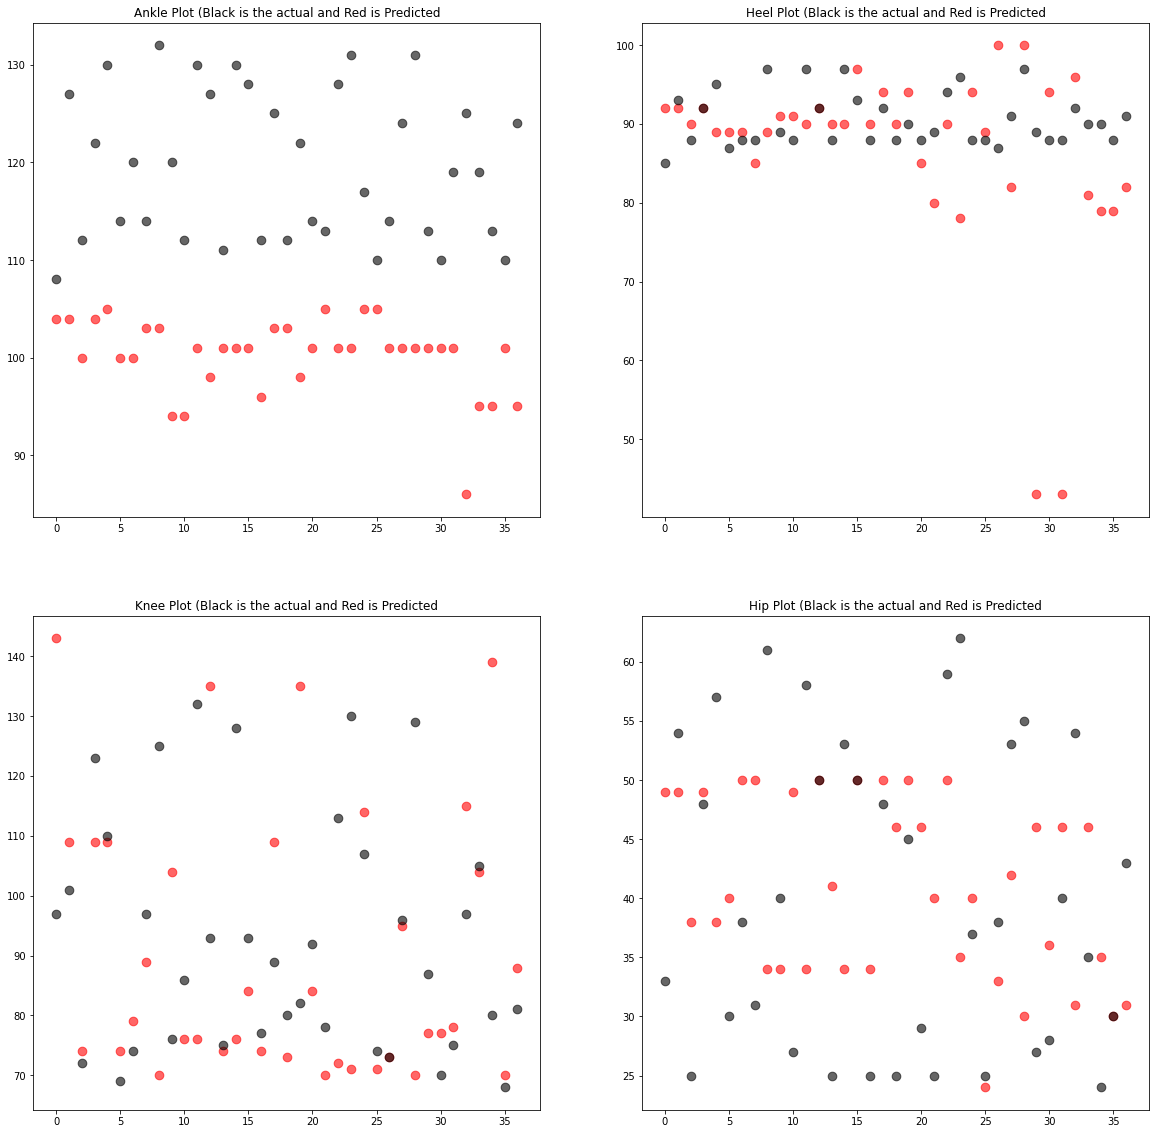

In [ ]:
# fig = plt.figure(figsize=(20,20))
# axes = fig.subplots(2,2)

# axes[0,0].scatter(predicted_ankle,actualAnkleplot,c='y',marker=',',s=50)
# axes[0,0].scatter(actualAnkleplot,predicted_ankle,c='black',marker='.',s=100)
# axes[0,0].set_title('Ankle Plot (Black is the actual and Yellow is Predicted')
# axes[0,1].scatter(predicted_heel,actualHeelplot,c='y',marker=',',s=50)
# axes[0,1].scatter(actualHeelplot,predicted_heel,c='black',marker='.',s=100)
# axes[0,1].set_title('Heel Plot (Black is the actual and Yellow is Predicted')
# axes[1,0].scatter(predicted_knee,actualKneeplot,c='y',marker=',',s=50)
# axes[1,0].scatter(actualKneeplot,predicted_knee,c='black',marker='.',s=100)
# axes[1, 0].set_title('Knee Plot (Black is the actual and Yellow is Predicted')
# axes[1,1].scatter(predicted_hip,actualHipplot,c='y',marker=',',s=50)
# axes[1,1].scatter(actualHipplot,predicted_hip,c='black',marker='.',s=100)
# axes[1, 1].set_title('Hip Plot (Black is the actual and Yellow is Predicted')
fig = plt.figure(figsize=(20,20))
axes = fig.subplots(2,2)

# axes[0,0].scatter(actualAnkleplot,predicted_ankle,c='y',marker=',',s=50)
# axes[0,0].scatter(actualAnkleplot,list(range(1, 360)),c='black',marker='.',s=100)
# axes[0,0].plot([actualAnkleplot.min(), actualAnkleplot.max()], [actualAnkleplot.min(), actualAnkleplot.max()], 'k--', lw=4)
axes[0,0].scatter(x = range(0, predicted_ankle.size), y=predicted_ankle, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[0,0].scatter(x = range(0, actualAnkleplot.size), y=actualAnkleplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[0,0].margins(0.5)
axes[0,0].set_title('Ankle Plot (Black is the actual and Red is Predicted')


axes[0,1].scatter(x = range(0, predicted_heel.size), y=predicted_heel, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[0,1].scatter(x = range(0, actualHeelplot.size), y=actualHeelplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[0,1].scatter(predicted_heel,actualHeelplot,c='y',marker=',',s=50)
# axes[0,1].scatter(actualHeelplot,predicted_heel,c='black',marker='.',s=100)
axes[0,1].set_title('Heel Plot (Black is the actual and Red is Predicted')


axes[1,0].scatter(x = range(0, predicted_knee.size), y=predicted_knee, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[1,0].scatter(x = range(0, actualKneeplot.size), y=actualKneeplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)
# axes[1,0].scatter(predicted_knee,actualKneeplot,c='y',marker=',',s=50)
# axes[1,0].scatter(actualKneeplot,predicted_knee,c='black',marker='.',s=100)
axes[1, 0].set_title('Knee Plot (Black is the actual and Red is Predicted')


axes[1,1].scatter(x = range(0, predicted_hip.size), y=predicted_hip, c = 'red', label = 'Predicted',marker='.',s=300,alpha=0.6)
axes[1,1].scatter(x = range(0, actualHipplot.size), y=actualHipplot, c = 'black',marker='.', label = 'Actual',s=300,alpha=0.6)

# axes[1,1].scatter(predicted_hip,actualHipplot,c='y',marker=',',s=50)
# axes[1,1].scatter(actualHipplot,predicted_hip,c='black',marker='.',s=100)
axes[1, 1].set_title('Hip Plot (Black is the actual and Red is Predicted')
# axes[0,0].scatter(predicted_ankle,actualAnkleplot,c='y',marker='.',s=100)
# axes[0,0].scatter(actualAnkleplot,predicted_ankle,c='black',marker='.',s=100)
# axes[0,0].set_title('Ankle Plot (Black is the actual and Yellow is Predicted')
# axes[0,1].scatter(predicted_heel,actualHeelplot,c='y',marker='.',s=100)
# axes[0,1].scatter(actualHeelplot,predicted_heel,c='black',marker='.',s=100)
# axes[0,1].set_title('Heel Plot (Black is the actual and Yellow is Predicted')
# axes[1,0].scatter(predicted_knee,actualKneeplot,c='y',marker='.',s=100)
# axes[1,0].scatter(actualKneeplot,predicted_knee,c='black',marker='.',s=100)
# axes[1, 0].set_title('Knee Plot (Black is the actual and Yellow is Predicted')
# axes[1,1].scatter(predicted_hip,actualHipplot,c='y',marker='.',s=100)
# axes[1,1].scatter(actualHipplot,predicted_hip,c='black',marker='.',s=100)
# axes[1, 1].set_title('Hip Plot (Black is the actual and Yellow is Predicted')

In [ ]:
import joblib

# save
joblib.dump(model, "ss.pkl") 

['modelDecisionTree.pkl']

In [ ]:
# load
import joblib
import xgboost as xgb

print(xgb.__version__)

model2 = joblib.load("modelDecisionTree.pkl")
x = np.array([[106/366,81/106,119/173,16/360]])

val = model2.predict(x)
# print(val)
print(np.array(val)*360)

0.90
[[124.  85. 146.  50.]]
